# Integrantes do Projeto

- André Borile
- Carlos Henrique Augustin
- Leonildo Linck
- Rafael Vaz
     

# Introdução

Este notebook contém nossa análise de dados para o projeto. Aqui, exploramos um conjunto de dados para responder a várias perguntas de negócios. O objetivo deste projeto é aplicar as técnicas de análise de dados que aprendemos e apresentar as conclusões dos dados com uma mentalidade de negócios.

## Estrutura do Notebook

O notebook está estruturado da seguinte maneira:

### Limpeza de dados

- **Divisão de Data Frames**: Particionamento de um DataFrame em subconjuntos menores.
- **Mesclagem de Data Frames**: Combinação de dois ou mais DataFrames com base em uma coluna comum.
- **Leitura de Arquivo com Dados**: Importação de dados de um arquivo para um DataFrame.
- **Preenchimento de Valores Faltantes**: Substituição de valores ausentes em um DataFrame.
- **Normalização**: Escalonamento de valores numéricos para um intervalo comum.
- **Transformação de Categórico para Numérico**: Conversão de variáveis categóricas em representações numéricas.
- **Tratamento de Datas**: Manipulação e formatação de campos de data.
- **Demonstração de Tipos de Dados**: Exibição dos tipos de dados presentes em um DataFrame.
- **Quantidade de Linhas e Colunas**: Contagem do número de linhas e colunas em um DataFrame.
- **Eliminação de Linhas Duplicadas**: Remoção de linhas duplicadas em um DataFrame.
- **Redefinição de Índice**: Alteração do índice de um DataFrame.
- **Agrupamento**: Agrupamento de dados com base em critérios específicos.
- **Criação de Novas Colunas**: Adição de novas colunas a um DataFrame.
- **Aplicação de Funções e Lambdas**: Uso de funções personalizadas e funções lambda para manipular dados.
- **Encontrar Valores Máximos e Mínimos**: Identificação dos valores máximos e mínimos em um DataFrame.
- **Separação dos Top 1%**: Filtragem dos dados para incluir apenas o top 1% dos registros.
- **Manipulação de Datas**: Alteração e formatação de campos de data.
- **Visualização de Dados Utilizando Matplotlib**: Criação de gráficos e visualizações de dados usando a biblioteca Matplotlib.

### Perguntas de Negócio

1. Qual o valor do ticket médio?
2. Qual é o período do trimestre em que observamos o maior volume de compras?
3. Qual o dia do mês tem o maior volume de compras?
4. Quais são os padrões de consumo por gênero para cada categoria de produtos disponíveis?
5. Quais são as três categorias de produtos mais vendidas?
6. Como o tipo de fidelização impacta no faturamento?
7. Como o método de pagamento se relaciona com o programa de fidelidade?
8. Como o método de pagamento impacta no faturamento bruto?
9. Como a wordcloud reflete as preferências dos clientes?
10. Quais são os horários mais lucrativos para o negócio?
11. Em que horários ocorrem as vendas mais expressivas para cada categoria de produtos?
12. Qual é a média de avaliação dos produtos e como ela se relaciona com as vendas?
13. Qual é a média de avaliações dos clientes por categorias?
14. Como o tipo de cliente (Member/Normal) influencia no ticket médio de compra?
15. Em relação as vendas mensais, quantas foram para afiliados?
16. Como a localização geográfica das filiais influencia nas preferências de produtos?
17. Qual é a relação entre o horário de compra e a quantidade de produtos adquiridos?
18. Qual é o gênero predominante entre os clientes?
19. Qual é o ticket médio entre os gêneros?
20. Qual é a linha de produto mais popular?
21. Qual é a cidade com o maior número de vendas?


Cada seção contém uma lista de técnicas que foram usadas, juntamente com o código correspondente.

Dataset:
https://www.kaggle.com/code/melikedilekci/supermarket-sales-eda/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

%matplotlib inline

### 01) Divisão de Data Frames

In [2]:
df_importacao_completo = pd.read_csv('supermarket_sales.csv')

In [3]:
metade = len(df_importacao_completo) // 2

In [4]:
df_importacao_parte1 = df_importacao_completo.iloc[:metade, :]
df_importacao_parte2 = df_importacao_completo.iloc[metade:, :]

In [5]:
df_importacao_parte1.to_csv('supermarket_sales_1.csv', index=False)
df_importacao_parte2.to_csv('supermarket_sales_2.csv', index=False)

In [6]:
df_parte1 = pd.read_csv('supermarket_sales_1.csv')
df_parte2 = pd.read_csv('supermarket_sales_2.csv')

### 02) Mesclagem de DataFrames

In [7]:
df = pd.concat([df_parte1, df_parte2], ignore_index=True)

In [8]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
colunas_para_remover = ['Invoice ID']

In [11]:
df = df.drop(colunas_para_remover, axis=1)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### 03) Leitura de arquivo com dados

In [12]:
df.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


### 04) Preenchimento valores faltantes

In [13]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [14]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

O dataset está limpo e livre de valores faltantes

### 05) Normalização

In [15]:
df['Rating'].value_counts(normalize=True)

Rating
6.0     0.026
6.6     0.024
4.2     0.022
9.5     0.022
6.5     0.021
        ...  
4.0     0.011
5.3     0.011
8.3     0.011
4.6     0.008
10.0    0.005
Name: proportion, Length: 61, dtype: float64

In [16]:
df['Rating'].fillna(df['Rating'].mean()).mean()

6.9727

In [17]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [18]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### 06) Transformação de Categórico para Numérico

In [19]:
df['Branch']

0      A
1      C
2      A
3      A
4      A
      ..
995    C
996    B
997    A
998    A
999    A
Name: Branch, Length: 1000, dtype: object

### 07) Tratamento de Datas

In [20]:
tipos_de_dados = df['Date'].dtypes
print('Tipo de dados da coluna Date:', tipos_de_dados)

Tipo de dados da coluna Date: object


In [21]:
tipos_de_dados = df['Time'].dtypes
print('Tipo de dados da coluna Time:', tipos_de_dados)

Tipo de dados da coluna Time: object


In [22]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M")

In [23]:
tipos_de_dados = df['Date'].dtypes
print('Tipo de dados da coluna Date:', tipos_de_dados)

Tipo de dados da coluna Date: datetime64[ns]


In [24]:
tipos_de_dados = df['Time'].dtypes
print('Tipo de dados da coluna Time:', tipos_de_dados)

Tipo de dados da coluna Time: datetime64[ns]


### 08) Demonstração tipos de dados

In [25]:
tipos_de_dados = df.info()
display(tipos_de_dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

None

### 09) Quantidade de linhas e colunas

In [26]:
num_linhas, num_colunas = df.shape
print(f'Número de linhas: {num_linhas}, Número de colunas: {num_colunas}')

Número de linhas: 1000, Número de colunas: 16


### 10) Eliminar linhas duplicadas

In [27]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [28]:
df = df.drop_duplicates()

In [29]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,65.82,4.761905,3.2910,4.1


### 11) Redefinição de índice

In [30]:
df = df.reset_index(drop=True)

In [31]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,65.82,4.761905,3.2910,4.1


### 12) Agrupamento

In [32]:
vendas_mensais = df.groupby('Product line')['Total'].sum()
vendas_mensais.sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

### 13) Criar novas colunas

In [33]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [34]:
tipos_de_dados = df.dtypes
display(tipos_de_dados)

Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day                                 int32
Month                               int32
Year                                int32
dtype: object

### 14) Aplicar funções e lambdas

Aplicando uma função lambda para um hipótese de merge com um dataset que avalia de 1 a 5:

In [35]:
df['Rating 2.0'] = df['Rating'].apply(lambda x: x / 2)

In [36]:
display(df['Rating 2.0'])

0      4.55
1      4.80
2      3.70
3      4.20
4      2.65
       ... 
995    3.10
996    2.20
997    3.85
998    2.05
999    3.30
Name: Rating 2.0, Length: 1000, dtype: float64

### 15) Encontrar maior/menor valores

In [37]:
melhor_avaliacao = df['Rating'].max()
pior_avaliacao = df['Rating'].min()

In [38]:
melhor_avaliacao

10.0

In [39]:
pior_avaliacao

4.0

### 16) Separar os top 1%

In [40]:
top_1_percento = df.nlargest(int(0.01 * len(df)), 'Unit price')

In [41]:
top_1_percento

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Rating 2.0
122,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.9820,944.6220,2019-03-09,1900-01-01 17:26:00,Credit card,899.64,4.761905,44.9820,4.2,9,3,2019,2.10
983,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,2019-01-23,1900-01-01 10:33:00,Cash,699.72,4.761905,34.9860,6.1,23,1,2019,3.05
930,B,Mandalay,Normal,Male,Home and lifestyle,99.92,6,29.9760,629.4960,2019-03-24,1900-01-01 13:33:00,Ewallet,599.52,4.761905,29.9760,7.1,24,3,2019,3.55
494,B,Mandalay,Normal,Male,Fashion accessories,99.89,2,9.9890,209.7690,2019-02-26,1900-01-01 11:48:00,Ewallet,199.78,4.761905,9.9890,7.1,26,2,2019,3.55
283,A,Yangon,Member,Male,Health and beauty,99.83,6,29.9490,628.9290,2019-03-04,1900-01-01 15:02:00,Ewallet,598.98,4.761905,29.9490,8.5,4,3,2019,4.25
300,C,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.9820,209.6220,2019-01-02,1900-01-01 18:09:00,Credit card,199.64,4.761905,9.9820,6.7,2,1,2019,3.35
941,C,Naypyitaw,Member,Male,Fashion accessories,99.82,9,44.9190,943.2990,2019-03-27,1900-01-01 10:43:00,Cash,898.38,4.761905,44.9190,6.6,27,3,2019,3.30
362,C,Naypyitaw,Normal,Male,Food and beverages,99.79,2,9.9790,209.5590,2019-03-07,1900-01-01 20:37:00,Ewallet,199.58,4.761905,9.9790,8.0,7,3,2019,4.00
326,A,Yangon,Member,Male,Food and beverages,99.78,5,24.9450,523.8450,2019-03-09,1900-01-01 19:09:00,Cash,498.90,4.761905,24.9450,5.4,9,3,2019,2.70
209,B,Mandalay,Normal,Female,Electronic accessories,99.73,9,44.8785,942.4485,2019-03-02,1900-01-01 19:42:00,Credit card,897.57,4.761905,44.8785,6.5,2,3,2019,3.25


### 17) Manipulação de datas

In [42]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [43]:
menor_data = df['Date'].min()
maior_data = df['Date'].max()

In [44]:
dias = (maior_data - menor_data).days

In [45]:
print(f'Os dados fornecidos começam em {menor_data.strftime("%d/%m/%Y")} e terminam {maior_data.strftime("%d/%m/%Y")}, totalizando {dias} dias de informações.')

Os dados fornecidos começam em 01/01/2019 e terminam 30/03/2019, totalizando 88 dias de informações.


### 18) Visualização de dados utilizando Matplotlib

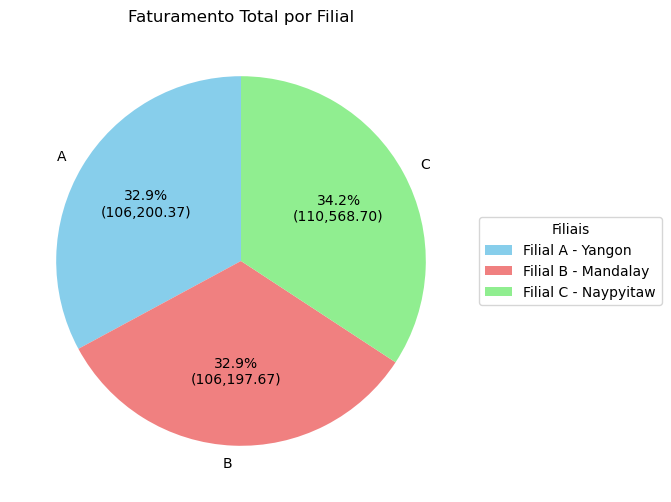

In [46]:
faturamento_por_filial = df.groupby('Branch')['Total'].sum()

rotulos_filiais = ['Filial A - Yangon', 'Filial B - Mandalay', 'Filial C - Naypyitaw']

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(faturamento_por_filial, labels=faturamento_por_filial.index, 
        autopct=lambda pct: "{:.1f}%\n({:,.2f})".format(pct, pct/100.*faturamento_por_filial.sum()), 
        startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])

plt.legend(wedges, rotulos_filiais,
           title="Filiais",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Faturamento Total por Filial')
plt.show()


# Perguntas de negócio

## 1) Qual o valor do ticket médio?

In [47]:
df['valor_total'] = df['Total'].sum() / df['Total'].count()

Q1 = df['valor_total'].quantile(0.25)
Q3 = df['valor_total'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_filtrado = df[(df['valor_total'] >= limite_inferior) & (df['valor_total'] <= limite_superior)]

ticket_medio = df_filtrado['valor_total'].median()

print(f'O ticket médio é $ {ticket_medio:.2f}')


O ticket médio é $ 322.97


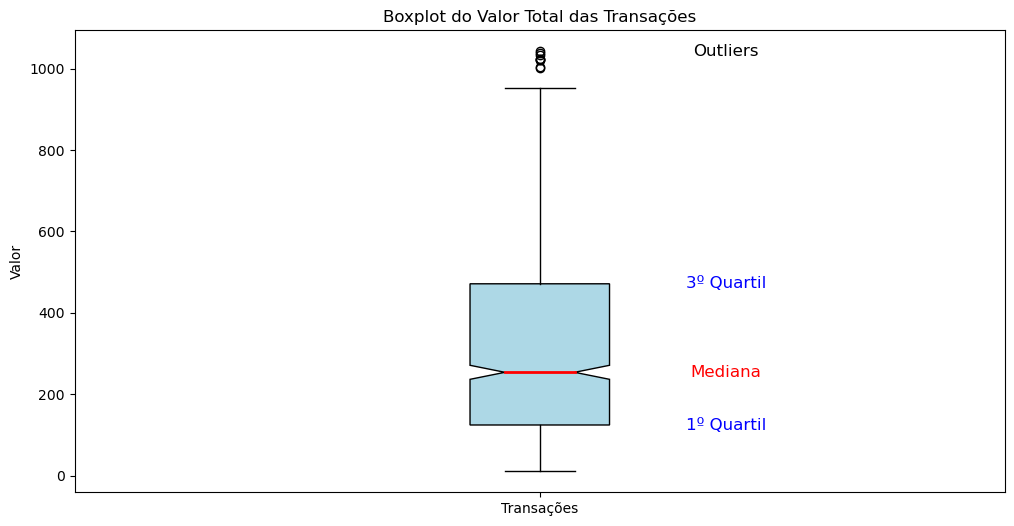

In [151]:
plt.figure(figsize=(12, 6))
caixa = plt.boxplot(df['Total'], patch_artist=True, notch=True, vert=1)

cores = ['lightblue']
for box, cor in zip(caixa['boxes'], cores):
    box.set_facecolor(cor)

for mediana in caixa['medians']:
    mediana.set(color='red', linewidth=2)

plt.title('Boxplot do Valor Total das Transações')
plt.ylabel('Valor')
plt.xticks([1], ['Transações'])

plt.text(1.2, df['Total'].median(), 'Mediana', ha='center', va='center', color='red', fontsize=12)
plt.text(1.2, df['Total'].quantile(0.25), '1º Quartil', ha='center', va='center', color='blue', fontsize=12)
plt.text(1.2, df['Total'].quantile(0.75), '3º Quartil', ha='center', va='center', color='blue', fontsize=12)
plt.text(1.2, df['Total'].max(), 'Outliers', ha='center', va='center', color='black', fontsize=12)

plt.show()


Resposta: O ticket médio é: 322.97.

Podemos otimizar o ticket médio das transações através de estratégias de upselling e cross-selling, oferecendo descontos em compras de maior valor e incentivando a compra de produtos complementares.

# 2) Qual é o ticket médio entre os gêneros?


In [158]:
ticket_medio_genero = df.groupby('Gender').agg({'Total': 'sum', 'Quantity': 'count'})
ticket_medio_genero['Ticket Médio'] = ticket_medio_genero['Total'] / ticket_medio_genero['Quantity']
ticket_medio_genero[['Total', 'Quantity', 'Ticket Médio']]

,Total,Quantity,Ticket Médio
Gender,,,
Female,167882.925,501,335.095659
Male,155083.824,499,310.789226


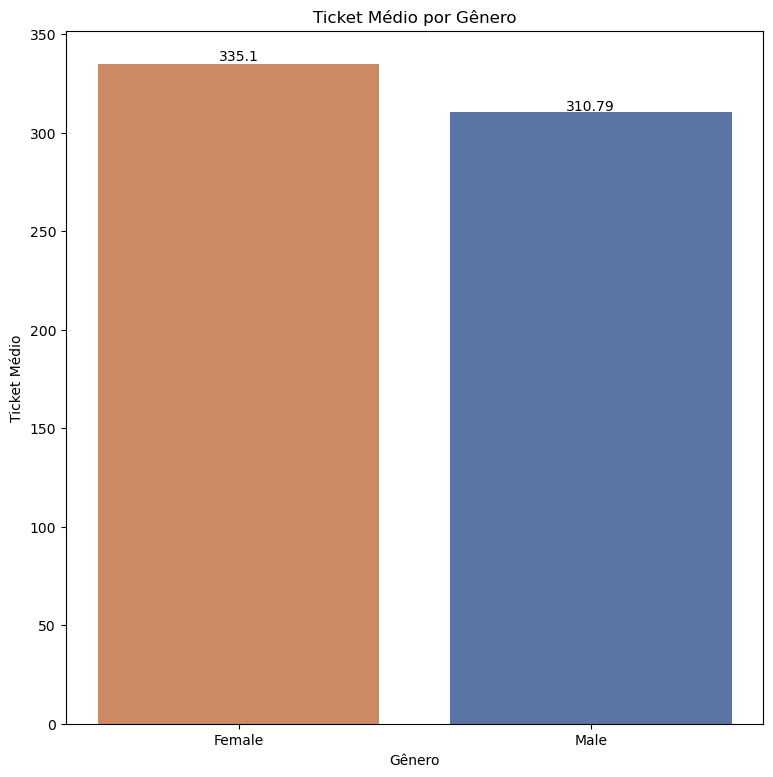

In [159]:
plt.bar(ticket_medio_genero.index, ticket_medio_genero['Ticket Médio'], color=["#CD8964", '#5975A4'])

eixo = plt.gca()

ticket_label = ticket_medio_genero['Ticket Médio']

for i, v in enumerate(ticket_label):
    eixo.text(i, int(v) + 0.03, round(v, 2), ha='center', va='bottom')


plt.xlabel('Gênero')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio por Gênero')
plt.rcParams['figure.figsize'] = (9,9)

plt.show()

Resposta: O ticket médio é USD 310,79 para o gênero masculino, e USD 335,10 para o gênero feminino. Uma diferença de aproximadamente 3,00%.

## 3) Como o tipo de cliente (Member/Normal) influencia no ticket médio de compra?


In [51]:
ticket_medio_por_cliente = df.groupby('Customer type')['Total'].mean().reset_index(name='Ticket Médio')
ticket_medio_por_cliente

,Customer type,Ticket Médio
0,Member,327.791305
1,Normal,318.122856


In [52]:
ticket_medio_cliente = df.groupby('Customer type').agg({'Total': 'sum', 'Quantity': 'count'})
ticket_medio_cliente.rename(columns={'Total': 'Montante', 'Quantity': 'No. Compras'}, inplace=True)
ticket_medio_cliente['Ticket Médio'] = ticket_medio_cliente['Montante'] / ticket_medio_cliente['No. Compras']

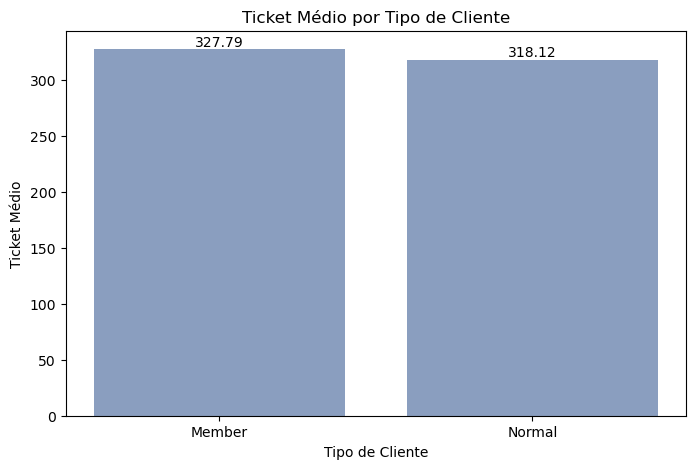

In [53]:
plt.figure(figsize=(8, 5))
barras = plt.bar(ticket_medio_cliente.index, ticket_medio_cliente['Ticket Médio'], color='#5975A4', alpha=0.7)

plt.xlabel('Tipo de Cliente')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio por Tipo de Cliente')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2),  ha='center', va='bottom')
    
plt.show()

Resposta: O montante de vendas e o ticket médio, mostram a eficácia da campanha de captação de clientes para o programa de fidelidade.

Insights: Beneficios oferecidos pelo programa de fidelidade acabam impactando positivamente nas compras dos clientes fidelizados. Isso sugere que a adesão ao programa de membros pode ser uma estratégia eficaz para aumentar o ticket médio de compra.

## 4) Qual é o período do trimestre em que observamos o maior volume de compras?

In [54]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Month'] = df['Date'].dt.month_name()  

vendas_mensais = df.groupby('Month')['Total'].sum().sort_values(ascending=False)
vendas_mensais

Month
January     116291.868
March       109455.507
February     97219.374
Name: Total, dtype: float64

In [55]:
total = vendas_mensais.sum()
porcentagens = (vendas_mensais / total) * 100

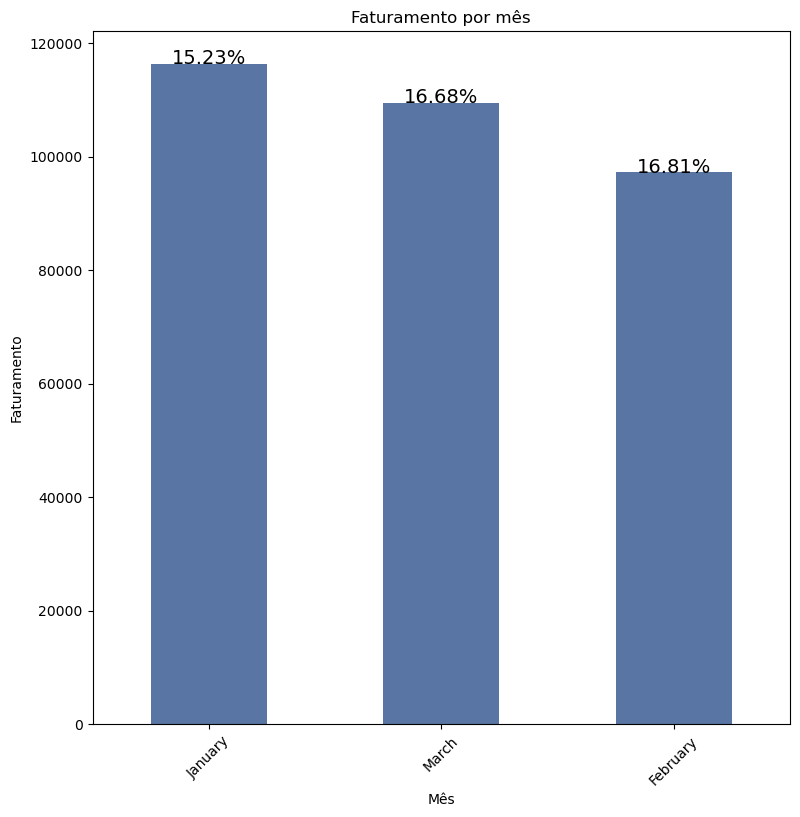

In [156]:
fig, eixo = plt.subplots()
vendas_mensais.plot(kind='bar', color='#5975A4')
eixo.set_xlabel('Mês')
eixo.set_ylabel('Faturamento')
eixo.set_title('Faturamento por mês')
eixo.set_xticklabels(vendas_mensais.index, minor=False, rotation=45)

for i, (p, v) in enumerate(zip(porcentagens, vendas_mensais)):
    eixo.text(i, v, f'{p:.2f}%', ha='center', fontsize=14)

plt.show()

Resposta: O maior volume de compras foi registrado em Janeiro

# 5) Qual o dia do mês tem o maior volume de compras?

In [57]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

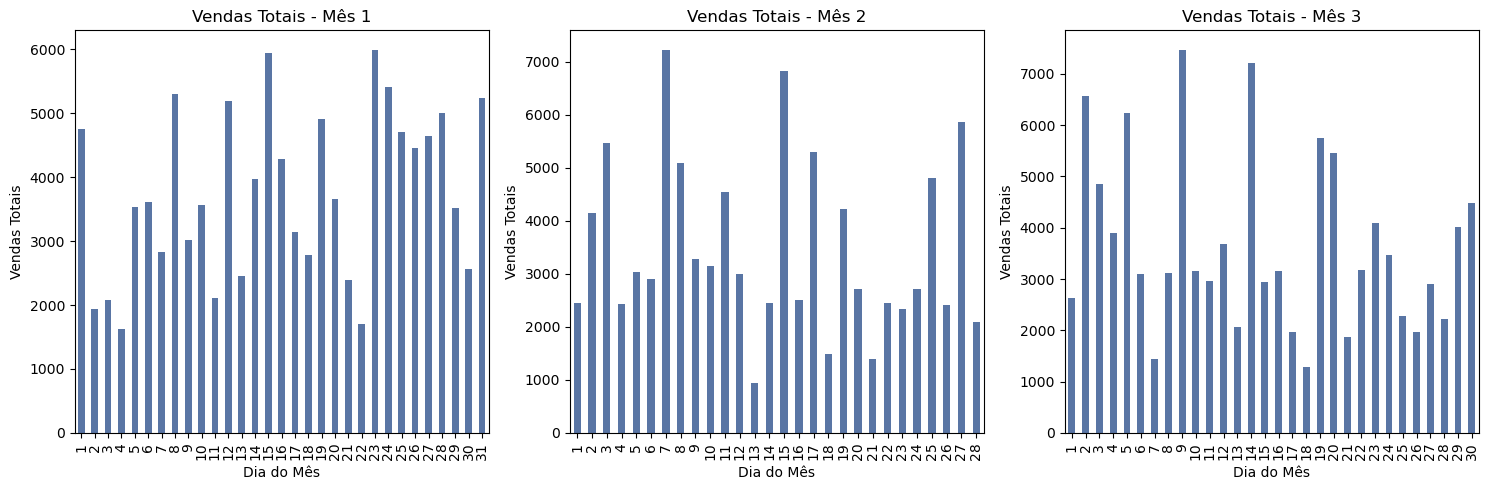

In [154]:
fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for mes, eixo in zip(range(1, 4), eixos):
    dia_mes = df[df['Month'] == mes]
    vendas_diarias = dia_mes.groupby('Day')['Total'].sum()    
    
    vendas_diarias.plot(kind='bar', color='#5975A4', ax=eixo)
    eixo.set_title(f'Vendas Totais - Mês {mes}')
    eixo.set_xlabel('Dia do Mês')
    eixo.set_ylabel('Vendas Totais')
plt.tight_layout()

plt.show()


Respostas: Os dias que mais venderam por mês foram (24/01, 07/02 e 09/03). Seriam necessários mais meses para se afirmar uma tendência.

Insights: Analisando o dia do mês em que mais vendas são feitas, podemos dimensionar estoque e promoções.

## 6) Quais são as três categorias de produtos mais vendidas?

In [59]:
produtos_mais_vendidos = df.groupby('Product line')['Total'].sum()
produtos_mais_vendidos

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [60]:
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)
top3_mais_vendidos

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Name: Total, dtype: float64

In [61]:
produtos_mais_vendidos = df.groupby('Product line')['Total'].sum()
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)

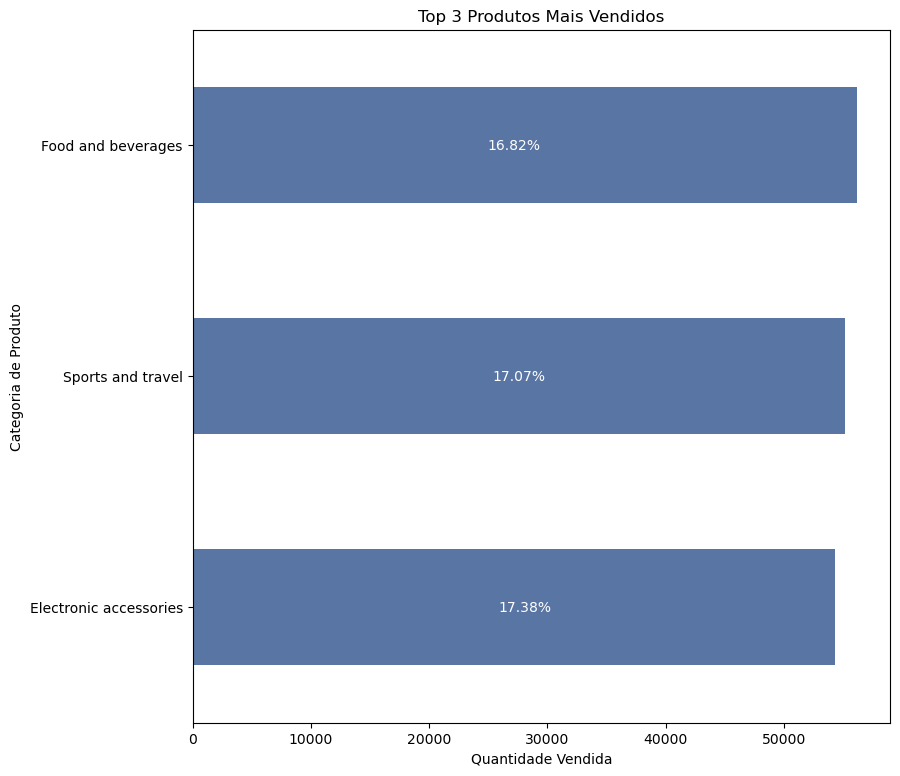

In [160]:
fig, eixo = plt.subplots()
top3_mais_vendidos.sort_values().plot(kind='barh', color='#5975A4')
eixo.set_xlabel('Quantidade Vendida')
eixo.set_ylabel('Categoria de Produto')
eixo.set_title('Top 3 Produtos Mais Vendidos')

total = produtos_mais_vendidos.sum()
porcentagens = (top3_mais_vendidos / total) * 100

for i, (p, v) in enumerate(zip(porcentagens, top3_mais_vendidos)):
    eixo.text(v/2, i, f'{p:.2f}%', va='center', ha='center', color='white')

plt.show()

## 7) Quais são as três categorias de produtos menos vendidas?

In [63]:
produtos_menos_vendidos = df.groupby('Product line')['Total'].sum()
produtos_menos_vendidos

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [64]:
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)
top3_menos_vendidos

Product line
Health and beauty      49193.739
Home and lifestyle     53861.913
Fashion accessories    54305.895
Name: Total, dtype: float64

In [65]:
produtos_menos_vendidos = df.groupby('Product line')['Total'].sum()
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)

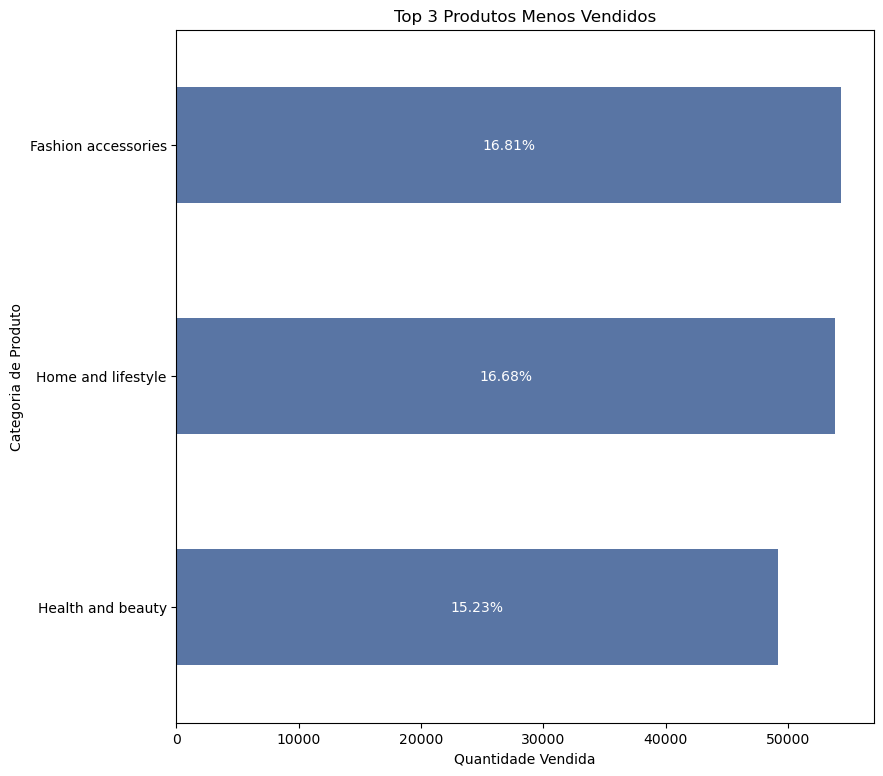

In [161]:
fig, eixo = plt.subplots()
top3_menos_vendidos.plot(kind='barh', color='#5975A4')
eixo.set_xlabel('Quantidade Vendida')
eixo.set_ylabel('Categoria de Produto')
eixo.set_title('Top 3 Produtos Menos Vendidos')

total = produtos_menos_vendidos.sum()
porcentagens = (top3_menos_vendidos / total) * 100

for i, (p, v) in enumerate(zip(porcentagens, top3_menos_vendidos)):
    eixo.text(v/2, i, f'{p:.2f}%', va='center', ha='center', color='white')

plt.show()


## 8) Qual é a linha de produto mais popular?

In [67]:
ticket_medio_genero = df.groupby('Gender').agg({'Total': 'sum', 'Quantity': 'count'})

In [68]:
produto_mais_popular = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
produto_mais_popular

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

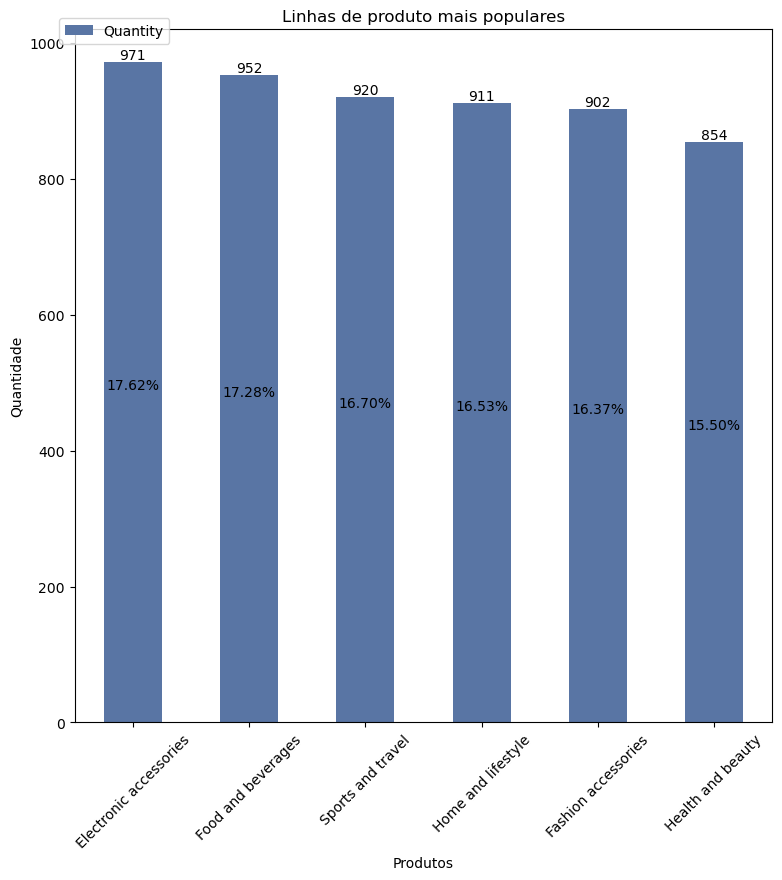

In [162]:
fig, eixo = plt.subplots()

barras = produto_mais_popular.plot(kind='bar', color='#5975A4')

eixo.set_xlabel('Produtos')
eixo.set_ylabel('Quantidade')
eixo.set_title('Linhas de produto mais populares')
eixo.set_xticklabels(eixo.get_xticklabels(), rotation=45, ha='center')

total = sum(produto_mais_popular)

for barra in barras.patches:
    valor_y = barra.get_height()
    eixo.text(barra.get_x() + barra.get_width() / 2, valor_y, round(valor_y, 2), ha='center', va='bottom', color='black')
    
    porcentagem = (valor_y / total) * 100
    eixo.text(barra.get_x() + barra.get_width() / 2, valor_y / 2, f'{porcentagem:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

Resposta: A linha de produto mais popular é 'Electronic accessories', com 971 unidades vendidas ao longo do trimestre analisado.

## 9) Qual é o gênero predominante entre os clientes?

In [70]:
contagem_genero = df['Gender'].value_counts()
contagem_genero

Gender
Female    501
Male      499
Name: count, dtype: int64

In [71]:
tabela_genero = pd.DataFrame({'Gênero': contagem_genero.index, 'Contagem': contagem_genero.values})
tabela_genero

,Gênero,Contagem
0,Female,501
1,Male,499


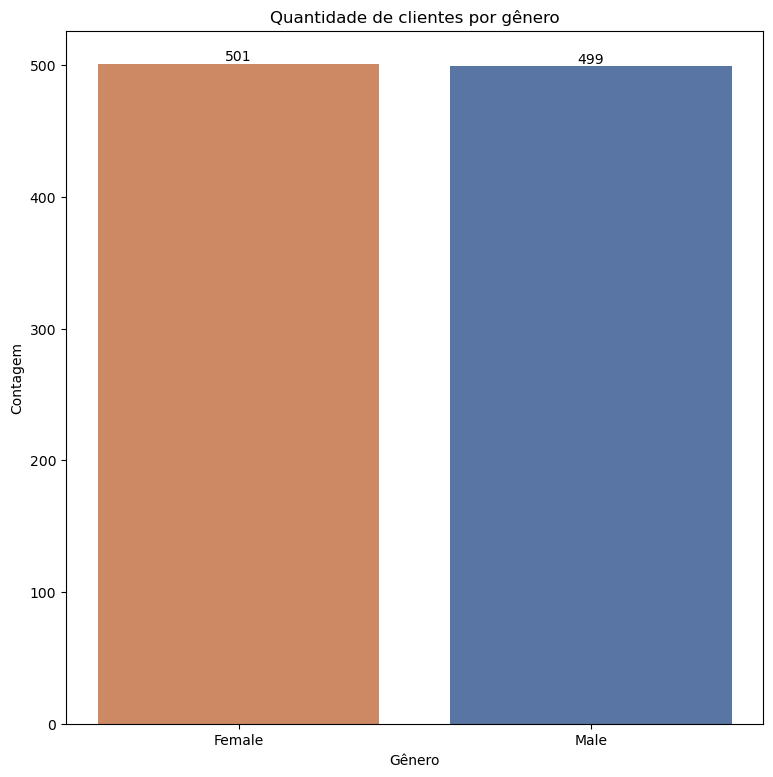

In [163]:
fig, eixo = plt.subplots()

barras = eixo.bar(contagem_genero.index, contagem_genero.values, color=["#CD8964", '#5975A4'])

for barra in barras:
    valor_y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, valor_y, round(valor_y, 2), ha='center', va='bottom')
    
plt.title('Quantidade de clientes por gênero')
eixo.set_xlabel('Gênero')
eixo.set_ylabel('Contagem')

plt.show()

Resposta: Apesar de semelhantes o gênero feminino está na frente.

## 10) Quais são os padrões de consumo por gênero para cada categoria de produtos disponíveis?

In [73]:
filtro_mulher = df[df['Gender'] == 'Female']
filtro_homem = df[df['Gender'] == 'Male']

In [74]:
transacoes_homem = filtro_homem['Product line'].value_counts()
transacoes_mulher= filtro_mulher['Product line'].value_counts()

In [75]:
transacoes_homem

Product line
Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: count, dtype: int64

In [76]:
transacoes_mulher

Product line
Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: count, dtype: int64

In [77]:
produtos = df['Product line'].unique()
produtos

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [78]:
transacoes_homem = transacoes_homem.reindex(produtos, fill_value=0)
transacoes_mulher = transacoes_mulher.reindex(produtos, fill_value=0)
index = np.arange(len(produtos))
index

array([0, 1, 2, 3, 4, 5])

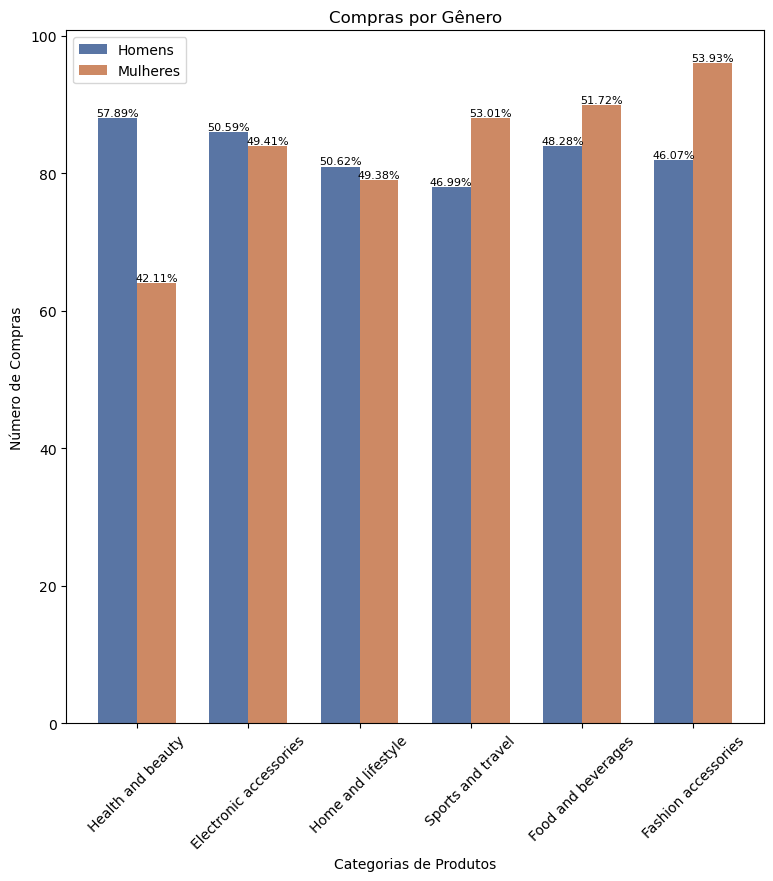

In [164]:
index = np.arange(len(produtos))

fig, eixo = plt.subplots()
largura_barra = 0.35

barra_homem = eixo.bar(index, transacoes_homem, largura_barra, label='Homens', color='#5975A4')
barra_mulher = eixo.bar(index + largura_barra, transacoes_mulher, largura_barra, label='Mulheres', color="#CD8964")

eixo.set_xlabel('Categorias de Produtos')
eixo.set_ylabel('Número de Compras')
eixo.set_title('Compras por Gênero')
eixo.set_xticks(index + largura_barra / 2)
eixo.set_xticklabels(produtos, minor=False, rotation=45)
eixo.legend()

for i in range(len(barra_homem)):
    valor_y_homem = barra_homem[i].get_height()
    valor_y_mulher = barra_mulher[i].get_height()
    total_categoria = valor_y_homem + valor_y_mulher
    porcentagem_homem = (valor_y_homem / total_categoria) * 100
    porcentagem_mulher = (valor_y_mulher / total_categoria) * 100
    plt.text(barra_homem[i].get_x() + barra_homem[i].get_width() / 2, valor_y_homem, f'{porcentagem_homem:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(barra_mulher[i].get_x() + barra_mulher[i].get_width() / 2, valor_y_mulher, f'{porcentagem_mulher:.2f}%', ha='center', va='bottom', color='black', fontsize=8)

plt.show()

Resposta: Os clientes do sexo masculino apresentam, de maneira intrigante, uma taxa de compras mais elevada na categoria de Saúde e Beleza. Essa observação pode sugerir uma possível inadequação na oferta de produtos, uma vez que, embora as mulheres tendam a ser a maioria nas compras dessa categoria, elas também demonstram ser mais seletivas em suas escolhas em comparação aos clientes masculinos. Essa discrepância pode indicar que os produtos atualmente disponíveis podem não estar totalmente alinhados com as preferências e expectativas do público feminino.

Insights: Investigar os produtos da categoria Health and Beauty, podendo ser através de uma pesquisa de satisfação com o público feminino.

## 11) Como o tipo de fidelização impacta no faturamento?

In [80]:
ticket_medio_cliente = df.groupby('Customer type').agg({'Total': 'sum', 'Quantity': 'count'})
ticket_medio_cliente.rename(columns={'Total': 'Montante', 'Quantity': 'No. Compras'}, inplace=True)
ticket_medio_cliente['Ticket Médio'] = ticket_medio_cliente['Montante'] / ticket_medio_cliente['No. Compras']

print(ticket_medio_cliente[['Montante', 'No. Compras', 'Ticket Médio']])

                 Montante  No. Compras  Ticket Médio
Customer type                                       
Member         164223.444          501    327.791305
Normal         158743.305          499    318.122856


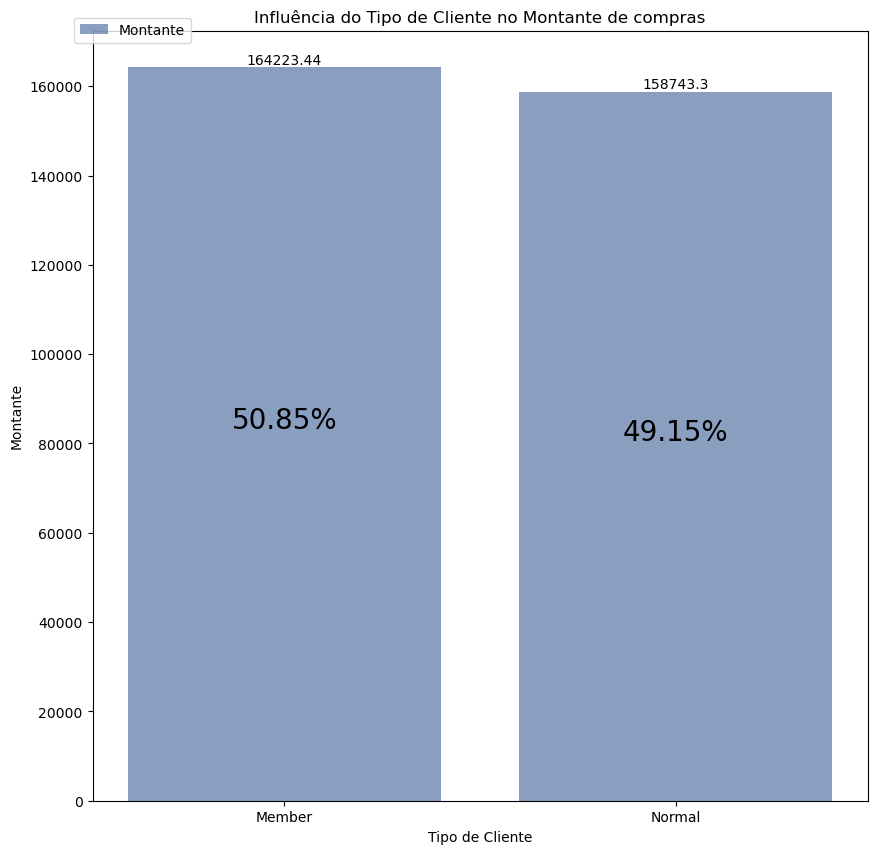

In [165]:
fig, eixo1 = plt.subplots(figsize=(10, 10))

barras = eixo1.bar(ticket_medio_cliente.index, ticket_medio_cliente['Montante'], color='#5975A4', alpha=0.7, label='Montante')

total = sum(ticket_medio_cliente['Montante'])

eixo1.set_xlabel('Tipo de Cliente')
eixo1.set_ylabel('Montante')
eixo1.set_title('Influência do Tipo de Cliente no Montante de compras')

for barra in barras:
    valor_y = barra.get_height()
    eixo1.text(barra.get_x() + barra.get_width() / 2, valor_y, round(valor_y, 2), ha='center', va='bottom', color='black')
    
    porcentagem = (valor_y / total) * 100
    eixo1.text(barra.get_x() + barra.get_width() / 2, valor_y / 2, f'{porcentagem:.2f}%', ha='center', va='bottom', color='black', fontsize=20)

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()


## 12) Em relação as vendas mensais, quantas foram para afiliados?

In [82]:
vendas_afiliados = df[df['Customer type'] == 'Member']

numero_vendas_afiliados = vendas_afiliados.shape[0]

print(f"Vendas para afiliados: {numero_vendas_afiliados}")

Vendas para afiliados: 501


In [83]:
vendas_nao_afiliados = df[df['Customer type'] == 'Normal']

numero_vendas_nao_afiliados = vendas_nao_afiliados.shape[0]

print(f"Vendas para não afiliados: {numero_vendas_nao_afiliados}")

Vendas para não afiliados: 499


In [84]:
vendas_afiliados_meses_1_2_3 = df[(df['Customer type'] == 'Member') & (df['Month'].isin([1, 2, 3]))]
vendas_normais_meses_1_2_3 = df[(df['Customer type'] == 'Normal') & (df['Month'].isin([1, 2, 3]))]

In [85]:
vendas_afiliados_por_mes = vendas_afiliados_meses_1_2_3.groupby('Month').size().reset_index(name='Afiliados')

In [86]:
vendas_normais_por_mes = vendas_normais_meses_1_2_3.groupby('Month').size().reset_index(name='Normais')

In [87]:
vendas_afiliados_por_mes

,Month,Afiliados
0,1,172
1,2,163
2,3,166


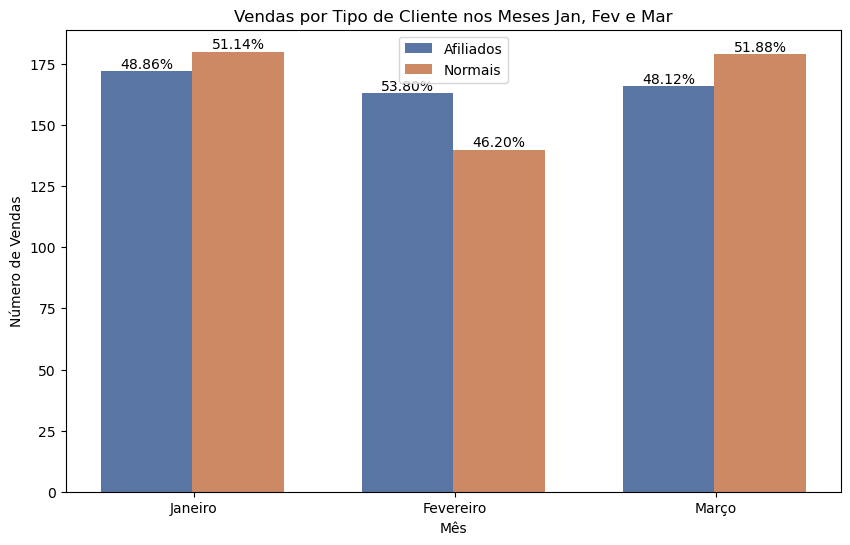

In [88]:
plt.figure(figsize=(10, 6))

posicoes_afiliados = vendas_afiliados_por_mes['Month']
largura_barra = 0.35 
posicoes_normais = posicoes_afiliados + largura_barra

barras_afiliados = plt.bar(posicoes_afiliados, vendas_afiliados_por_mes['Afiliados'], largura_barra, color='#5975A4', label='Afiliados')
barras_normais = plt.bar(posicoes_normais, vendas_normais_por_mes['Normais'], largura_barra, color="#CD8964", label='Normais')

plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas por Tipo de Cliente nos Meses Jan, Fev e Mar')
plt.xticks(vendas_afiliados_por_mes.index + 1.18, ['Janeiro', 'Fevereiro', 'Março'])
plt.legend()

for i in range(len(barras_afiliados)):
    yval_afiliados = barras_afiliados[i].get_height()
    yval_normais = barras_normais[i].get_height()
    total_mes = yval_afiliados + yval_normais
    percentage_afiliados = (yval_afiliados / total_mes) * 100
    percentage_normais = (yval_normais / total_mes) * 100
    plt.text(barras_afiliados[i].get_x() + barras_afiliados[i].get_width() / 2, yval_afiliados, f'{percentage_afiliados:.2f}%', ha='center', va='bottom', color='black')
    plt.text(barras_normais[i].get_x() + barras_normais[i].get_width() / 2, yval_normais, f'{percentage_normais:.2f}%', ha='center', va='bottom', color='black')

plt.show()

Resposta: Apesar do volume de faturamente ser maior para os Membros, em números de vendas, ela são praticamentes iguais. Isso indica que o programa de afiliados é eficaz em gerar receita.

## 13) Como o método de pagamento se relaciona com o programa de fidelidade?

In [89]:
pagamento_total = df['Total'].sum()
pagamento_total

322966.749

In [90]:
pagamentos_membros = df.loc[df['Customer type'].isin(['Member']), ['Payment', 'Total']]
pagamentos_membros

,Payment,Total
0,Ewallet,548.9715
3,Ewallet,489.0480
6,Ewallet,433.6920
8,Credit card,76.1460
9,Credit card,172.7460
...,...,...
988,Ewallet,864.5700
989,Credit card,633.1080
994,Ewallet,63.9975
997,Cash,33.4320


In [91]:
pagamentos_nao_membros = df.loc[df['Customer type'].isin(['Normal']), ['Payment', 'Total']]
pagamentos_nao_membros

,Payment,Total
1,Cash,80.2200
2,Credit card,340.5255
4,Ewallet,634.3785
5,Ewallet,627.6165
7,Ewallet,772.3800
...,...,...
992,Ewallet,121.8630
993,Ewallet,183.6450
995,Ewallet,42.3675
996,Ewallet,1022.4900


In [92]:
meios_pagamentos = df['Payment'].unique()
meios_pagamentos

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [93]:
total_pagamentos_membros = pagamentos_membros.groupby('Payment')['Total'].sum()
total_pagamentos_membros

Payment
Cash           54661.0155
Credit card    57771.4725
Ewallet        51790.9560
Name: Total, dtype: float64

In [94]:
total_pagamentos_nao_membros = pagamentos_nao_membros.groupby('Payment')['Total'].sum()
total_pagamentos_nao_membros

Payment
Cash           57545.5545
Credit card    42995.5995
Ewallet        58202.1510
Name: Total, dtype: float64

In [125]:
index = np.arange(len(meios_pagamentos))
index

array([0, 1, 2])

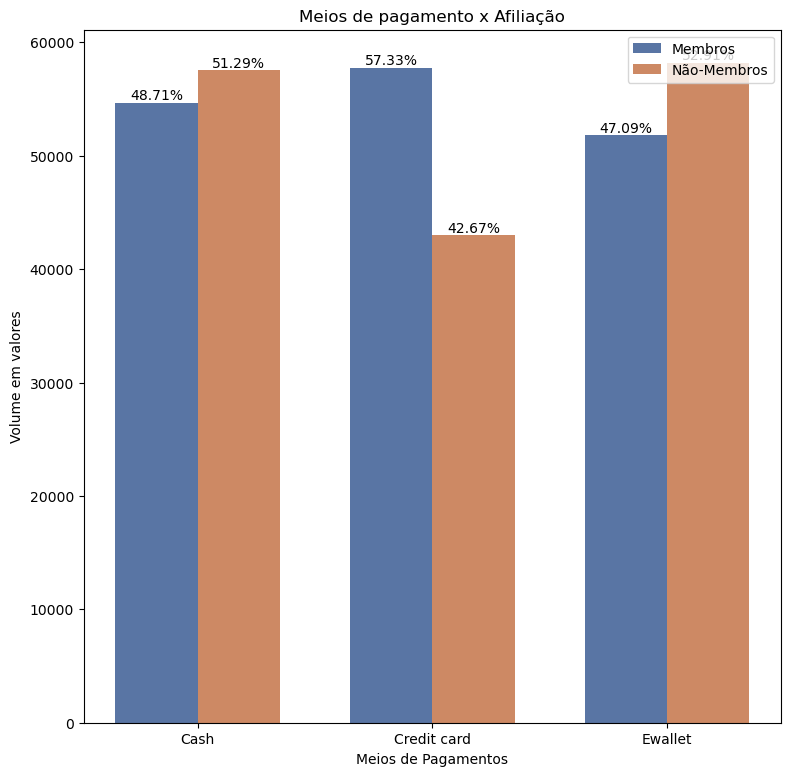

In [127]:
fig, ax = plt.subplots()
bar_width = 0.35

barra_membros = ax.bar(index, total_pagamentos_membros, bar_width, label='Membros', color='#5975A4')
barra_nao_membros = ax.bar(index + bar_width, total_pagamentos_nao_membros, bar_width, label='Não-Membros', color="#CD8964")

ax.set_xlabel('Meios de Pagamentos')
ax.set_ylabel('Volume em valores')
ax.set_title('Meios de pagamento x Afiliação')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(total_pagamentos_membros.index)
ax.legend()

for i in range(len(barra_membros)):
    yval_membros = barra_membros[i].get_height()
    yval_nao_membros = barra_nao_membros[i].get_height()
    total_pagamento = yval_membros + yval_nao_membros
    percentage_membros = (yval_membros / total_pagamento) * 100
    percentage_nao_membros = (yval_nao_membros / total_pagamento) * 100
    plt.text(barra_membros[i].get_x() + barra_membros[i].get_width() / 2, yval_membros, f'{percentage_membros:.2f}%', ha='center', va='bottom', color='black')
    plt.text(barra_nao_membros[i].get_x() + barra_nao_membros[i].get_width() / 2, yval_nao_membros, f'{percentage_nao_membros:.2f}%', ha='center', va='bottom', color='black')

plt.rcParams['figure.figsize'] = (9,9)
plt.show()


Resposta: De maneira geral, os membros preferem pagar com cartão de crédito e consumidores normais com eWallets.

## 14) Como o método de pagamento impacta no faturamento bruto?

In [97]:
vendas_pagamento = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)
vendas_pagamento

Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64

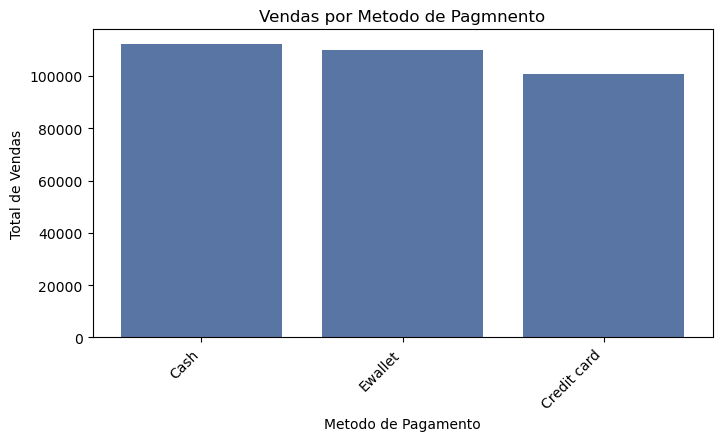

In [98]:
plt.figure(figsize=(8, 4))

plt.bar(vendas_pagamento.index, vendas_pagamento, color='#5975A4')

plt.title('Vendas por Metodo de Pagmnento')
plt.xlabel('Metodo de Pagamento')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')

plt.show()

Resposta: Embora a diferença seja pequena, dinheiro é a opção de pagamento mais utilizada pelos clientes, seguida por eWallet e após, cartão de crédito.

Insights: Verificar a oferta de caixas eletrônicos nas lojas. Desenvolver parcerias com eWallets e operadoras de cartão de crédito, também avaliar a criação de um cartão de crédito da loja, oferecendo condições e parcelamento especiais para associados.

## 15) Quais são os horários mais lucrativos para o negócio?

In [99]:
df['Dia_da_Semana'] = df['Date'].dt.day_name()
df['Hora'] = df['Time'].dt.hour

In [100]:
faturamento_por_dia_semana_hora = df.groupby(['Dia_da_Semana', 'Hora'])['Total'].sum().reset_index()
faturamento_por_dia_semana_hora

,Dia_da_Semana,Hora,Total
0,Friday,10,5671.6905
1,Friday,11,2649.2865
2,Friday,12,2159.2410
3,Friday,13,6824.3070
4,Friday,14,5166.2730
...,...,...,...
72,Wednesday,16,3229.6215
73,Wednesday,17,3101.2695
74,Wednesday,18,4233.7680
75,Wednesday,19,4160.1735


In [101]:
hora_faturamento_maximo_por_dia = faturamento_por_dia_semana_hora.loc[faturamento_por_dia_semana_hora.groupby('Dia_da_Semana')['Total'].idxmax()]
hora_faturamento_maximo_por_dia

,Dia_da_Semana,Hora,Total
3,Friday,13,6824.307
16,Monday,15,5141.346
31,Saturday,19,9117.381
42,Sunday,19,5963.643
44,Thursday,10,6885.228
64,Tuesday,19,9198.672
69,Wednesday,13,6734.343


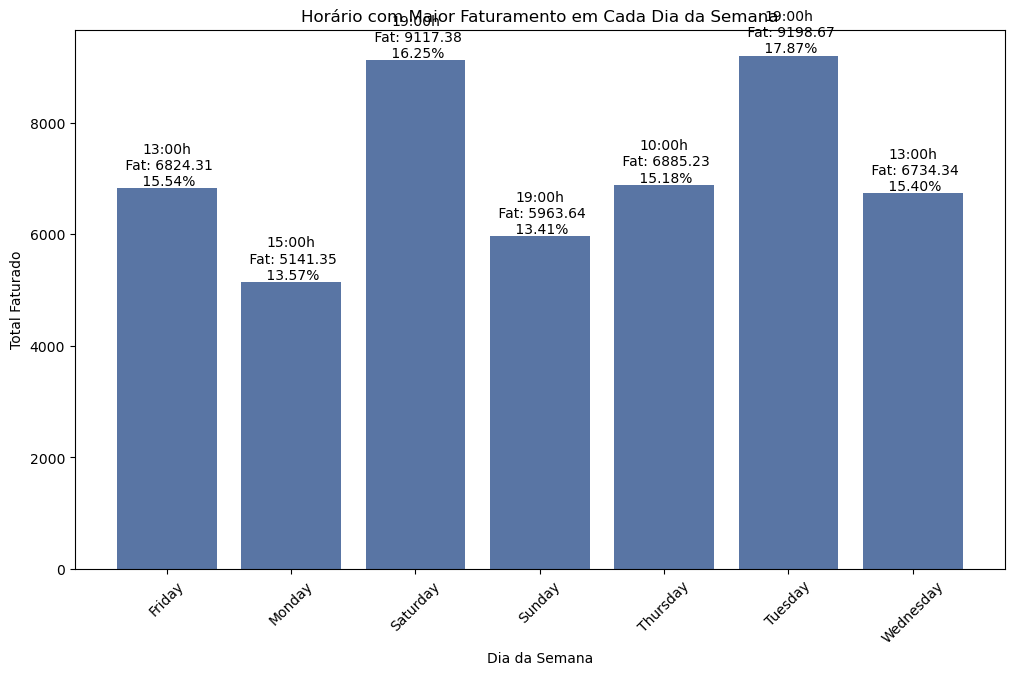

In [166]:
total_faturamento_por_dia = df.groupby('Dia_da_Semana')['Total'].sum()

plt.figure(figsize=(12, 7))

plt.bar(hora_faturamento_maximo_por_dia['Dia_da_Semana'], hora_faturamento_maximo_por_dia['Total'], color='#5975A4')

for i, linha in hora_faturamento_maximo_por_dia.iterrows():
    porcentagem = (linha['Total'] / total_faturamento_por_dia[linha['Dia_da_Semana']]) * 100
    plt.text(linha['Dia_da_Semana'], linha['Total'], f"{linha['Hora']}:00h\n Fat: {linha['Total']:.2f}\n {porcentagem:.2f}%", color='black', 
             ha='center', va='bottom')

plt.title('Horário com Maior Faturamento em Cada Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total Faturado')
plt.xticks(rotation=45, ha='center')

plt.show()

Resposta: O período mais rentável para as lojas é geralmente às 19:00, sendo especialmente vantajoso durante três dias da semana. Além disso, o horário das 13:00 também é considerado lucrativo para o negócio.

Insights: Estruturar promoções específicas para incentivar compras de múltiplos produtos durante esses horários; otimizar o estoque para atender à demanda.

## 16) Em que horários ocorrem as vendas mais expressivas para cada categoria de produtos?


In [103]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hora'] = df['Time'].dt.hour

In [104]:
vendas = df.groupby(['Product line', 'Hora'])['Quantity'].sum().reset_index()
vendas

,Product line,Hora,Quantity
0,Electronic accessories,10,89
1,Electronic accessories,11,98
2,Electronic accessories,12,89
3,Electronic accessories,13,76
4,Electronic accessories,14,84
...,...,...,...
61,Sports and travel,16,96
62,Sports and travel,17,54
63,Sports and travel,18,57
64,Sports and travel,19,131


In [105]:
idx = vendas.groupby('Product line')['Quantity'].idxmax()
horarios_mais_vendas = vendas.loc[idx]
horarios_mais_vendas

,Product line,Hora,Quantity
9,Electronic accessories,19,105
14,Fashion accessories,13,112
31,Food and beverages,19,138
37,Health and beauty,14,119
51,Home and lifestyle,17,123
64,Sports and travel,19,131


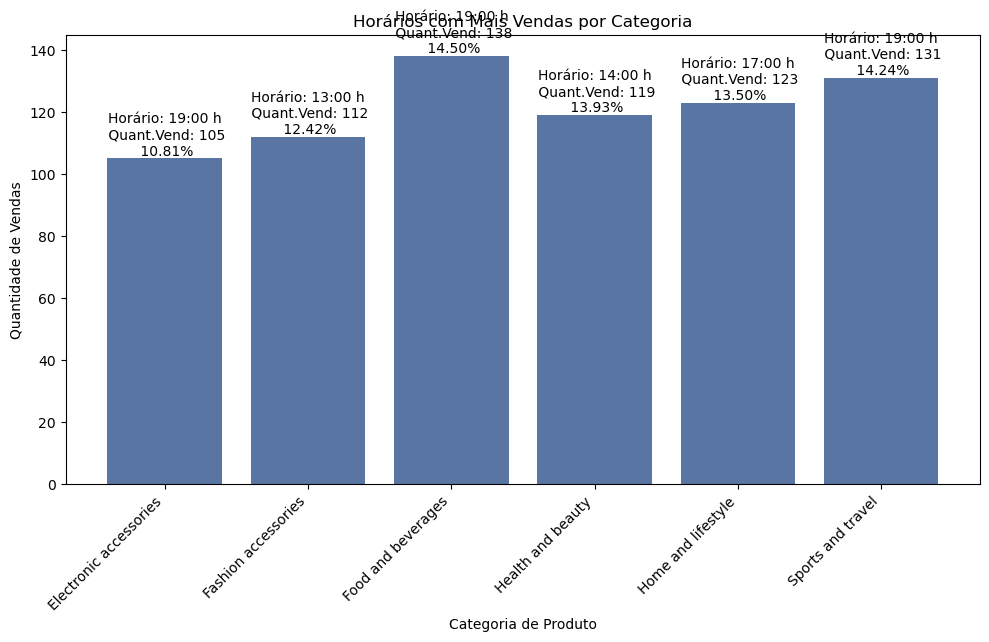

In [129]:
total_vendas_por_categoria = df.groupby('Product line')['Quantity'].sum()

plt.figure(figsize=(10, 6.5))

for i, coluna in horarios_mais_vendas.iterrows():
    plt.bar(coluna['Product line'], coluna['Quantity'], label=f"{coluna['Hora']}:00", color='#5975A4')
    percentage = (coluna['Quantity'] / total_vendas_por_categoria[coluna['Product line']]) * 100
    plt.text(coluna['Product line'], coluna['Quantity'], f"Horário: {coluna['Hora']}:00 h\n Quant.Vend: {coluna['Quantity']}\n {percentage:.2f}%", ha='center', va='bottom')

plt.title('Horários com Mais Vendas por Categoria')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Resposta: Anteriormente observamos como o dia da semana influencia no faturamente, agora olhamos por um prisma diferente, observamos quais horários determinada categoria de produtos mais vende.

## 17) Qual é a relação entre o horário de compra e a quantidade de produtos adquiridos?


In [107]:
df['Hour'] = df['Time'].dt.floor('H')

In [108]:
df['Hour'] = df['Hour'].dt.strftime('%H:%M')

In [109]:
hora_agregada = df.groupby('Hour')['Quantity'].sum().reset_index()
hora_agregada

,Hour,Quantity
0,10:00,525
1,11:00,513
2,12:00,501
3,13:00,585
4,14:00,495
5,15:00,530
6,16:00,420
7,17:00,415
8,18:00,475
9,19:00,649


<Figure size 1000x650 with 0 Axes>

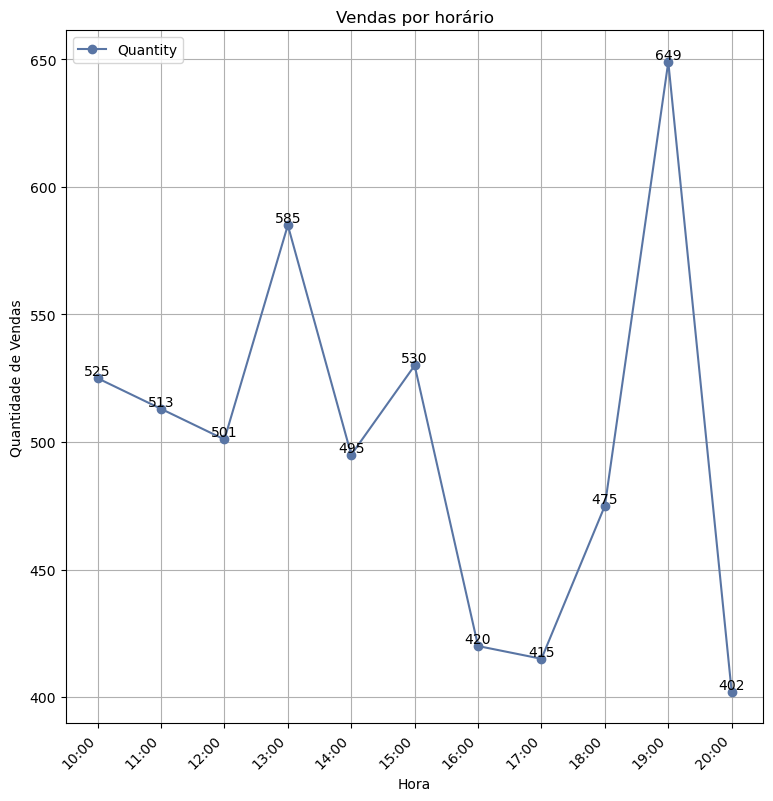

In [134]:
hora_agregada = df.groupby('Hour')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6.5))

plot = hora_agregada.plot(kind='line', marker='o', color='#5975A4')

plt.title('Vendas por horário')
plt.xlabel('Hora')
plt.ylabel('Quantidade de Vendas')

horarios = hora_agregada.index
plt.xticks(range(len(horarios)), horarios)
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(hora_agregada['Hour'])
plt.grid(True)

for i, v in enumerate(hora_agregada['Quantity']):
    plot.text(i, v, int(v), ha='center', va='bottom')

plt.show()

Resposta: A quantidade de produtos adquiridos é maior no horário de 19:00hs, indicando que a preferência do publico é comprar a noite, no final do dia.

Insights: Melhorar eficiência operacional através do correto dimensionamento de recursos durante esse horário. Podemos abordar também estratégias ontime, como promoções relâmpago, ou sorteios para membros nesse horário.

## 18) Qual é a média de avaliação dos produtos e como ela se relaciona com as vendas?


In [111]:
media_avaliacao =df['Rating'].mean()
media_avaliacao

6.9727

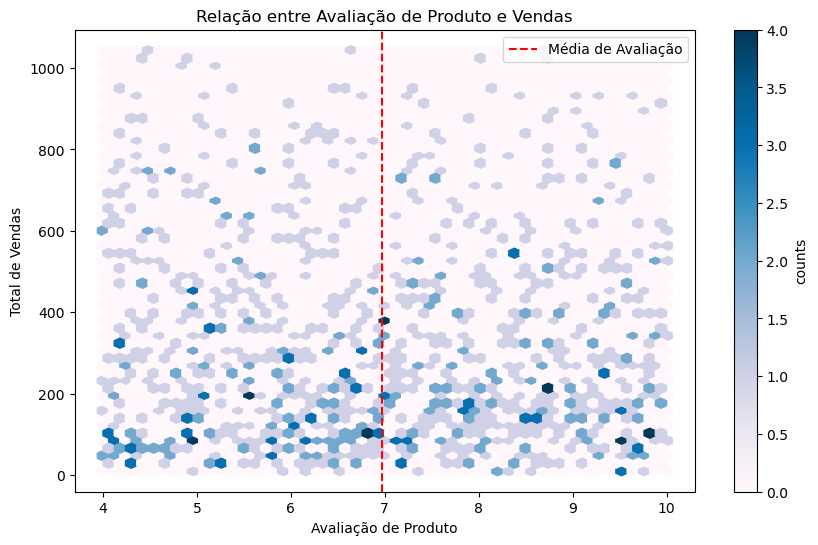

In [112]:
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['Rating'], df['Total'], gridsize=50, cmap='PuBu')
cb = plt.colorbar(hb)
cb.set_label('counts')

plt.axvline(x=media_avaliacao, color='red', linestyle='--', label='Média de Avaliação')

plt.xlabel('Avaliação de Produto')
plt.ylabel('Total de Vendas')
plt.title('Relação entre Avaliação de Produto e Vendas')
plt.legend()

plt.show()

Resposta: A média de avaliação dos produtos é de 6.97. Encontramos o gráfico de dispersão um pouco difuso, indicando que talvez o critério e o método de avaliação precisarão ser revistos.

## 19) Qual é a média de avaliações dos clientes por categorias?


In [113]:
classificacao_media_por_categoria = df.groupby('Product line')['Rating'].mean()
classificacao_media_por_categoria

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [114]:
resumo_categoria = df.groupby('Product line').agg({'Rating': 'mean', 'Total': 'sum'}).reset_index()
resumo_categoria

,Product line,Rating,Total
0,Electronic accessories,6.924706,54337.5315
1,Fashion accessories,7.029213,54305.8950
2,Food and beverages,7.113218,56144.8440
3,Health and beauty,7.003289,49193.7390
4,Home and lifestyle,6.837500,53861.9130
5,Sports and travel,6.916265,55122.8265


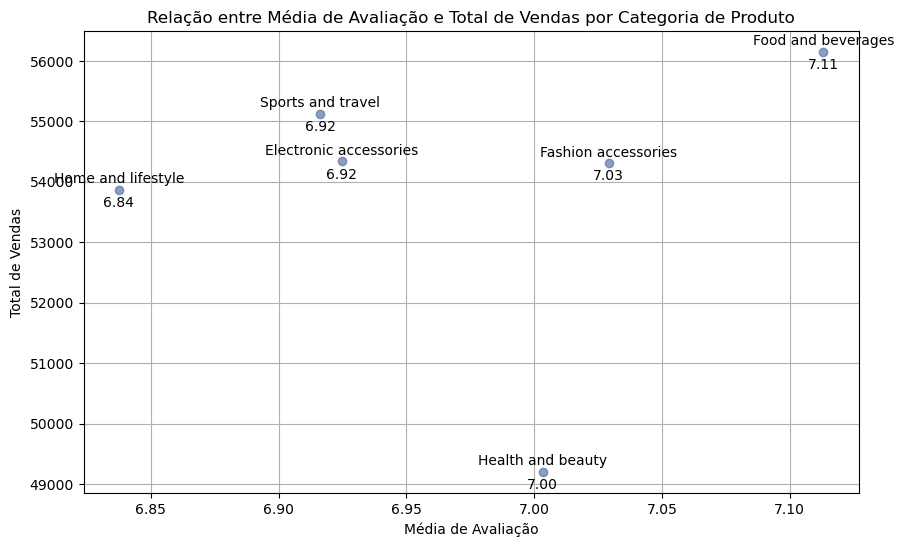

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(resumo_categoria['Rating'], resumo_categoria['Total'], color='#5975A4', alpha=0.7)

plt.xlabel('Média de Avaliação')
plt.ylabel('Total de Vendas')
plt.title('Relação entre Média de Avaliação e Total de Vendas por Categoria de Produto')

for i, texto in enumerate(resumo_categoria['Product line']):
    plt.annotate(texto, (resumo_categoria['Rating'][i], resumo_categoria['Total'][i]), textcoords="offset points", xytext=(0,5), ha='center')    
    plt.text(resumo_categoria['Rating'][i], resumo_categoria['Total'][i] - 100, f'{resumo_categoria["Rating"][i]:.2f}', ha='center', va='top', color='black')

plt.grid(True)
plt.show()

Resposta: "Food and Beverages" tem as maiores medias de avaliação e "Sport and Travel" possui um total maior de vendas, isso mostra que as avaliaçoes são importantes porém as vendas podem ser influencidas por outros fatores como a popularidade do produto, demanda do mercado, sazionalidade e etc. 

## 20) Como a localização geográfica das filiais influencia nas preferências de produtos?


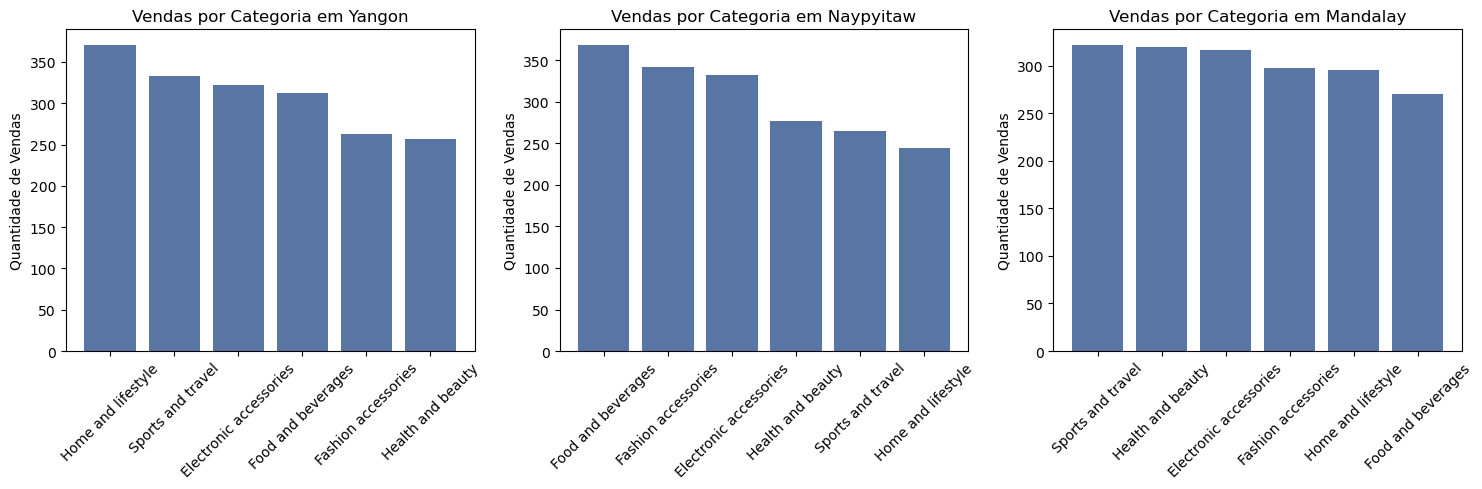

In [168]:
df_local = df[['City', 'Product line', 'Quantity']]
cidades = df_local['City'].unique()

fig, axes = plt.subplots(ncols=len(cidades), figsize=(15, 5))
for i, cidade in enumerate(cidades):
    dados_cidade = df_local[df_local['City'] == cidade]
    vendas_por_categoria = dados_cidade.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

    axes[i].bar(vendas_por_categoria.index, vendas_por_categoria, color='#5975A4')
    axes[i].set_title(f'Vendas por Categoria em {cidade}')
    axes[i].set_ylabel('Quantidade de Vendas')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

Resposta: Na filial Yangon, 'Home and Lifestyle' é a categoria mais adquirida, Naypyitaw tem como carro chefe o consumo de comida e bebida e por fim Mandalay compra mais 'Sports and Travel'.

Insights: Compreender as preferências de produtos baseadas na localização pode informar decisões de estoque, rotas de distrubuição do CD e marketing.

## 21) Qual é a cidade com o maior número de vendas?

In [117]:
vendas_cidade = df.groupby('City')['Total'].sum().sort_values(ascending=False)
print(vendas_cidade)

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64


In [118]:
faturamento_cidade = df.groupby('City')['Quantity'].sum().sort_values(ascending=False)
print(faturamento_cidade)

City
Yangon       1859
Naypyitaw    1831
Mandalay     1820
Name: Quantity, dtype: int64


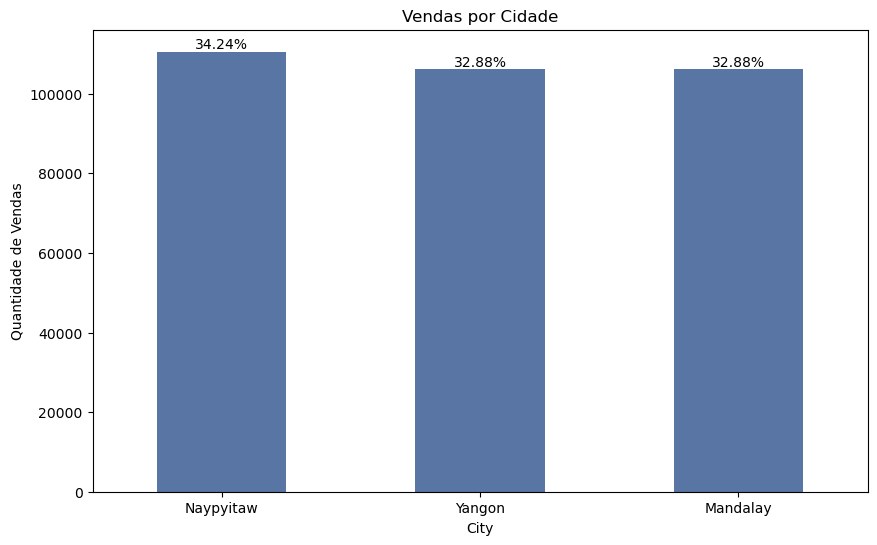

In [172]:
eixo = vendas_cidade.plot(kind='bar', figsize=(10, 6), color='#5975A4')

plt.title('Vendas por Cidade')
plt.ylabel('Quantidade de Vendas')

plt.xticks(rotation=0)

total = sum(vendas_cidade)

for barra in eixo.patches:
    yval = barra.get_height()
    percentage = (yval / total) * 100
    plt.text(barra.get_x() + barra.get_width() / 2, yval, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

plt.show()

Resposta: A cidade com o maior número de vendas é Yangon, euquanto Naypyitaw é a cidade que gasta mais.

Insights: Apesar de estarem bem próximas em volume e quantidade de vendas, compreender quais cidades têm o maior número de vendas pode orientar decisões como: abertura de novas filiais, ou direcionamento de recursos de marketing.